In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
%matplotlib inline

# Read data

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
X_train, y_train = train_data.drop('class of diagnosis', axis=1), train_data['class of diagnosis']
X_test, y_test = test_data.drop('class of diagnosis', axis=1), test_data['class of diagnosis']

continuous_names = ['age',
                        'duration of asbestos exposure',
                        'duration of symptoms', 'white blood',
                        'cell count (WBC)', 'platelet count (PLT)',
                        'sedimentation', 'blood lactic dehydrogenise (LDH)',
                        'alkaline phosphatise (ALP)', 'total protein',
                        'albumin', 'glucose', 'pleural lactic dehydrogenise',
                        'pleural protein', 'pleural albumin',
                        'pleural glucose', 'C-reactive protein (CRP)']

# Scale continuous data
Without this step, neural network works extremely poorly

In [3]:
scaler = StandardScaler()
scaler.fit(X_train[continuous_names])
scaled_cont = scaler.transform(X_train[continuous_names])

X_train_matrix = np.zeros((259, 48))
X_train_matrix[:, :17] = scaled_cont
X_train_matrix[:, 17:] = X_train.drop(continuous_names, axis =1).as_matrix()

In [4]:
scaler = StandardScaler()
scaler.fit(X_test[continuous_names])
scaled_cont = scaler.transform(X_test[continuous_names])

X_test_matrix = np.zeros((65, 48))
X_test_matrix[:, :17] = scaled_cont
X_test_matrix[:, 17:] = X_test.drop(continuous_names, axis =1).as_matrix()

# Test multiple hyper-parameters

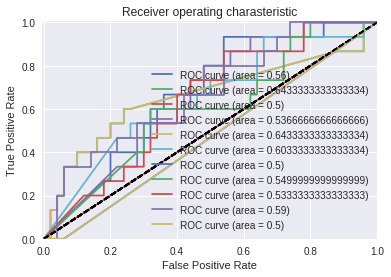

In [5]:
AOC = []
param =[]
lista = []
for i in range(10):
    ile = np.random.randint(5)
    k = []
    for i in range(ile):
        k.append(np.random.randint(300))
    k.append(2)
    lista.append(tuple(k))

lista.append((69, 395, 2))
for el in lista:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=el, random_state=1)
    clf.fit(X_train_matrix, y_train)    

    #print("Neural net accuracy = {}".format(accuracy_score(y_test, clf.predict(X_test))))

    #print("NN AUC = {}".format(nn_roc_auc))
    #print(classification_report(y_test, clf.predict(X_test)))
    nn_roc_auc = roc_auc_score(y_test, clf.predict(X_test_matrix))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_matrix)[:, 1])

    plt.plot(fpr, tpr, label="ROC curve (area = {})".format(nn_roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.005])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charasteristic")
    plt.legend(loc="lower right")
    AOC.append(nn_roc_auc)
    param.append(el)